# Solve N-Queens problem with simulated annealing 
***SamanArzaghi_610398096***

## Import some libraries

In [1]:
import random
from math import exp
import time
from copy import deepcopy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

## Creat a chess board

With the following code we can create a chess board which there is only one queen in each column and row!

In [2]:
def create_board(n):
    '''
        n : number of queens ( type : int )
    '''
    # creat a board as a dictionary
    chess_board = {}
    temp = list(range(n))
    # shuffle to make sure it is random
    random.shuffle(temp)  
    column = 0
    # choose that queen be in which column and row
    while(len(temp) > 0):
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board

## Calculate the cost of a single chess borad(fitness)

We know if there is less than 2 queens in board(the size of chess board is smaller than 2 * 2), the cost of chess board is 0(beacause there is only one queen in board, and for 2 queens(the size of board is exactly 2 * 2), the cost is 1(beacuse two quenns will always face each other any way in size of 2 * 2), for for more than 2 queens(the size of board is more than 2 * 2).

For calculating cost of a chess board we have two parts:

1 - Choose two queens in n queens.

2 - Calculate how many pairs of threaten queen.

For first part we use the below function:

In [3]:
def threat_calculate(n):
    '''
        n : number of queens ( type : int )
    '''
    # if there is less than 2 queens
    if(n < 2):
        return 0
    # if there is only 2 queens
    if(n == 2):
        return 1
    # for more than 2 queens we use combination formula below
    return (n - 1) * n / 2

For the seconde part we use below function:

In [4]:
def cost(chess_board):
    '''
        chess_board : a single board of chess ( type : dictionary )
    '''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}
    # with the loop below we will find how many queens are threating each other diagnol.
    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if(temp_a not in a_chessboard):
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1
    # add the threat cost to threat variable
    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard
    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard
    return threat

## Mutation function

For mutation function we will choose two randome queens(genes), and switch the positoin of two queens.

In [6]:
def mutation(successor, N_QUEENS):
    # find two deifferent queens
    while True:
        index_1 = random.randrange(0, N_QUEENS - 1)
        index_2 = random.randrange(0, N_QUEENS - 1)
        if(index_1 != index_2):
            break
    # switch the position
    successor[index_1], successor[index_2] = successor[index_2], successor[index_1]  

## Implement the local search(simulated annealing)

For the local search we will use simulated annealing.

In simulated annealing we have two important factors, first is "temperature" and second is "cooling_coefficient". With the cooling_coefficient we are going to make temperature smaller and smaller...

In every temperature step we will make new generation with mutation function. after making new generation, in only two situations we will replace new generation with its own parent:

1 : if new genereation cost less than the old one.

OR

2 : or the following situation is valid(it's a simulated annealing formula) -> random.uniform(0, 1) < exp(-delta / temperature) (which delta = cost(new_gen)-cost(old) )

now let's implement the simulated anealing...

In [7]:
def simulated_annealing(temperature, num_population, N_QUEENS):
    '''
        temperature : temperature of simulated annealing ( type : int )
        num_population : number of the population ( type : int )
        N_QUEES : number of queens ( type : int )
    '''
    solution_found = False
    # creat a population which every single one is different
    answers = []
    while(num_population != len(answers)):
        answer = create_board(N_QUEENS)
        if(answer not in answers):
            answers.append(answer)
    # creat a list to save each cost
    cost_answers = []
    for i in range(len(answers)):
        cost_answers.append(cost(answers[i]))
    # define simulated annealing parametrs
    t = temperature
    cooling_coefficient = 0.999
    while(t > 0):
        # cool down the teperature
        t *= cooling_coefficient
        # check if the solution found so far
        if(solution_found == True):
            break
        # do mutation and local search in every member of population
        for i in range(len(answers)):
            answer = answers[i]
            cost_answer = cost_answers[i]
            successor = deepcopy(answer)
            # apply the mutation function 
            mutation(successor, N_QUEENS)
            # find the delta of new and old 
            delta = cost(successor) - cost_answer
            # check if simulated annealing situation is valid
            if(delta < 0 or random.uniform(0, 1) < exp(-delta / t)):
                answer = deepcopy(successor)
                cost_answer = cost(answer)
            # upgrade the answer and its cost
            answers[i] = answer
            cost_answers[i] = cost_answer
            # check if the cost of new member is zero
            if(cost_answer == 0):
                solution_found = True
                print_chess_board(answer)
                break
    # check if we faild to find the right answer
    if(solution_found is False):
        print("Failed")

## Print the answer

For printing the answer, first we need to save the answer.

With the code below we can save the answer.

In [8]:
def print_chess_board(board):
    '''
        board : chess board of positions of queens ( type : ditionary )
    '''
    # global the variable that we can access it out side of the function
    global queens_loc
    queens_loc = []
    # save the column location of queens in a list
    for column, row in board.items():
        queens_loc.append(row)

## Visualize the chess board

To visualize the board, we need to creat a matrix of board, which on in between have the same number(to make it plaid) and set 1 to cells which queens exist.

In [9]:
def make_board(queens_loc):
    '''
        queens_loc : queens column locations ( type : list )
    '''
    len_board = len(queens_loc)
    board = [[1 for i in range(len_board)] for j in range(len_board)]
    for i in range(len_board):
        for j in range(len_board):
            if(queens_loc[j] != i):
                if(((i % 2) == 1 and (j % 2) == 0) or ((i % 2) == 0 and (j % 2) == 1)):
                    board[i][j] = 500
                else:
                    board[i][j] = 400
    return board

## In The End

Now we will put everything to gether

In [10]:
def nq_ma(temperature, num_population, N_QUEENS):
    start = time.time()
    simulated_annealing(temperature, num_population, N_QUEENS)
    print("Runtime in second:", time.time() - start)

## 8_queens

For 8_queens we use below parameters:

temperature = 1, num_population = 10, N_QUUENS = 8

In [11]:
nq_ma(1,10,8)
print(queens_loc)

Runtime in second: 0.015619993209838867
[7, 1, 4, 2, 0, 6, 3, 5]


visualize the data

(<matplotlib.image.AxesImage at 0x14f969d5430>, (-0.5, 7.5, 7.5, -0.5))

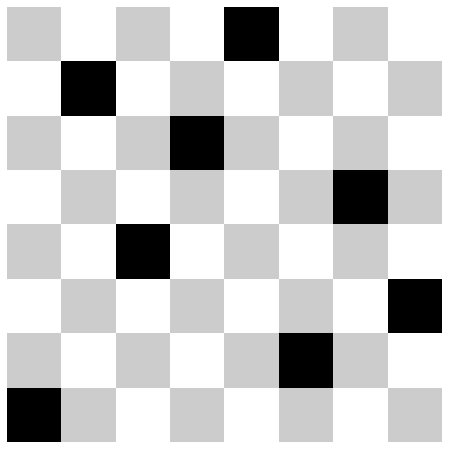

In [12]:
board = make_board(queens_loc)
board = np.array(board)
plt.figure(figsize=(8,8))
plt.imshow(board, cmap='gray'), plt.axis('off')

## 100_queens

For 100_queens we use below parameters:

temperature = 1, num_population = 5, N_QUUENS = 100

In [13]:
nq_ma(10, 5, 100)
print(queens_loc)

Runtime in second: 13.067023277282715
[63, 22, 29, 62, 48, 83, 39, 47, 82, 69, 93, 7, 21, 35, 71, 92, 59, 53, 66, 70, 19, 94, 50, 41, 37, 2, 30, 56, 13, 96, 68, 24, 34, 80, 75, 16, 60, 9, 11, 91, 18, 67, 5, 31, 15, 61, 88, 55, 87, 4, 64, 81, 49, 98, 33, 42, 38, 3, 73, 17, 20, 95, 79, 86, 84, 90, 27, 6, 0, 52, 54, 51, 78, 8, 12, 65, 44, 77, 1, 74, 99, 23, 36, 45, 76, 26, 14, 32, 28, 10, 57, 89, 25, 46, 97, 43, 85, 40, 72, 58]


visualize the data

(<matplotlib.image.AxesImage at 0x14f98a52070>, (-0.5, 99.5, 99.5, -0.5))

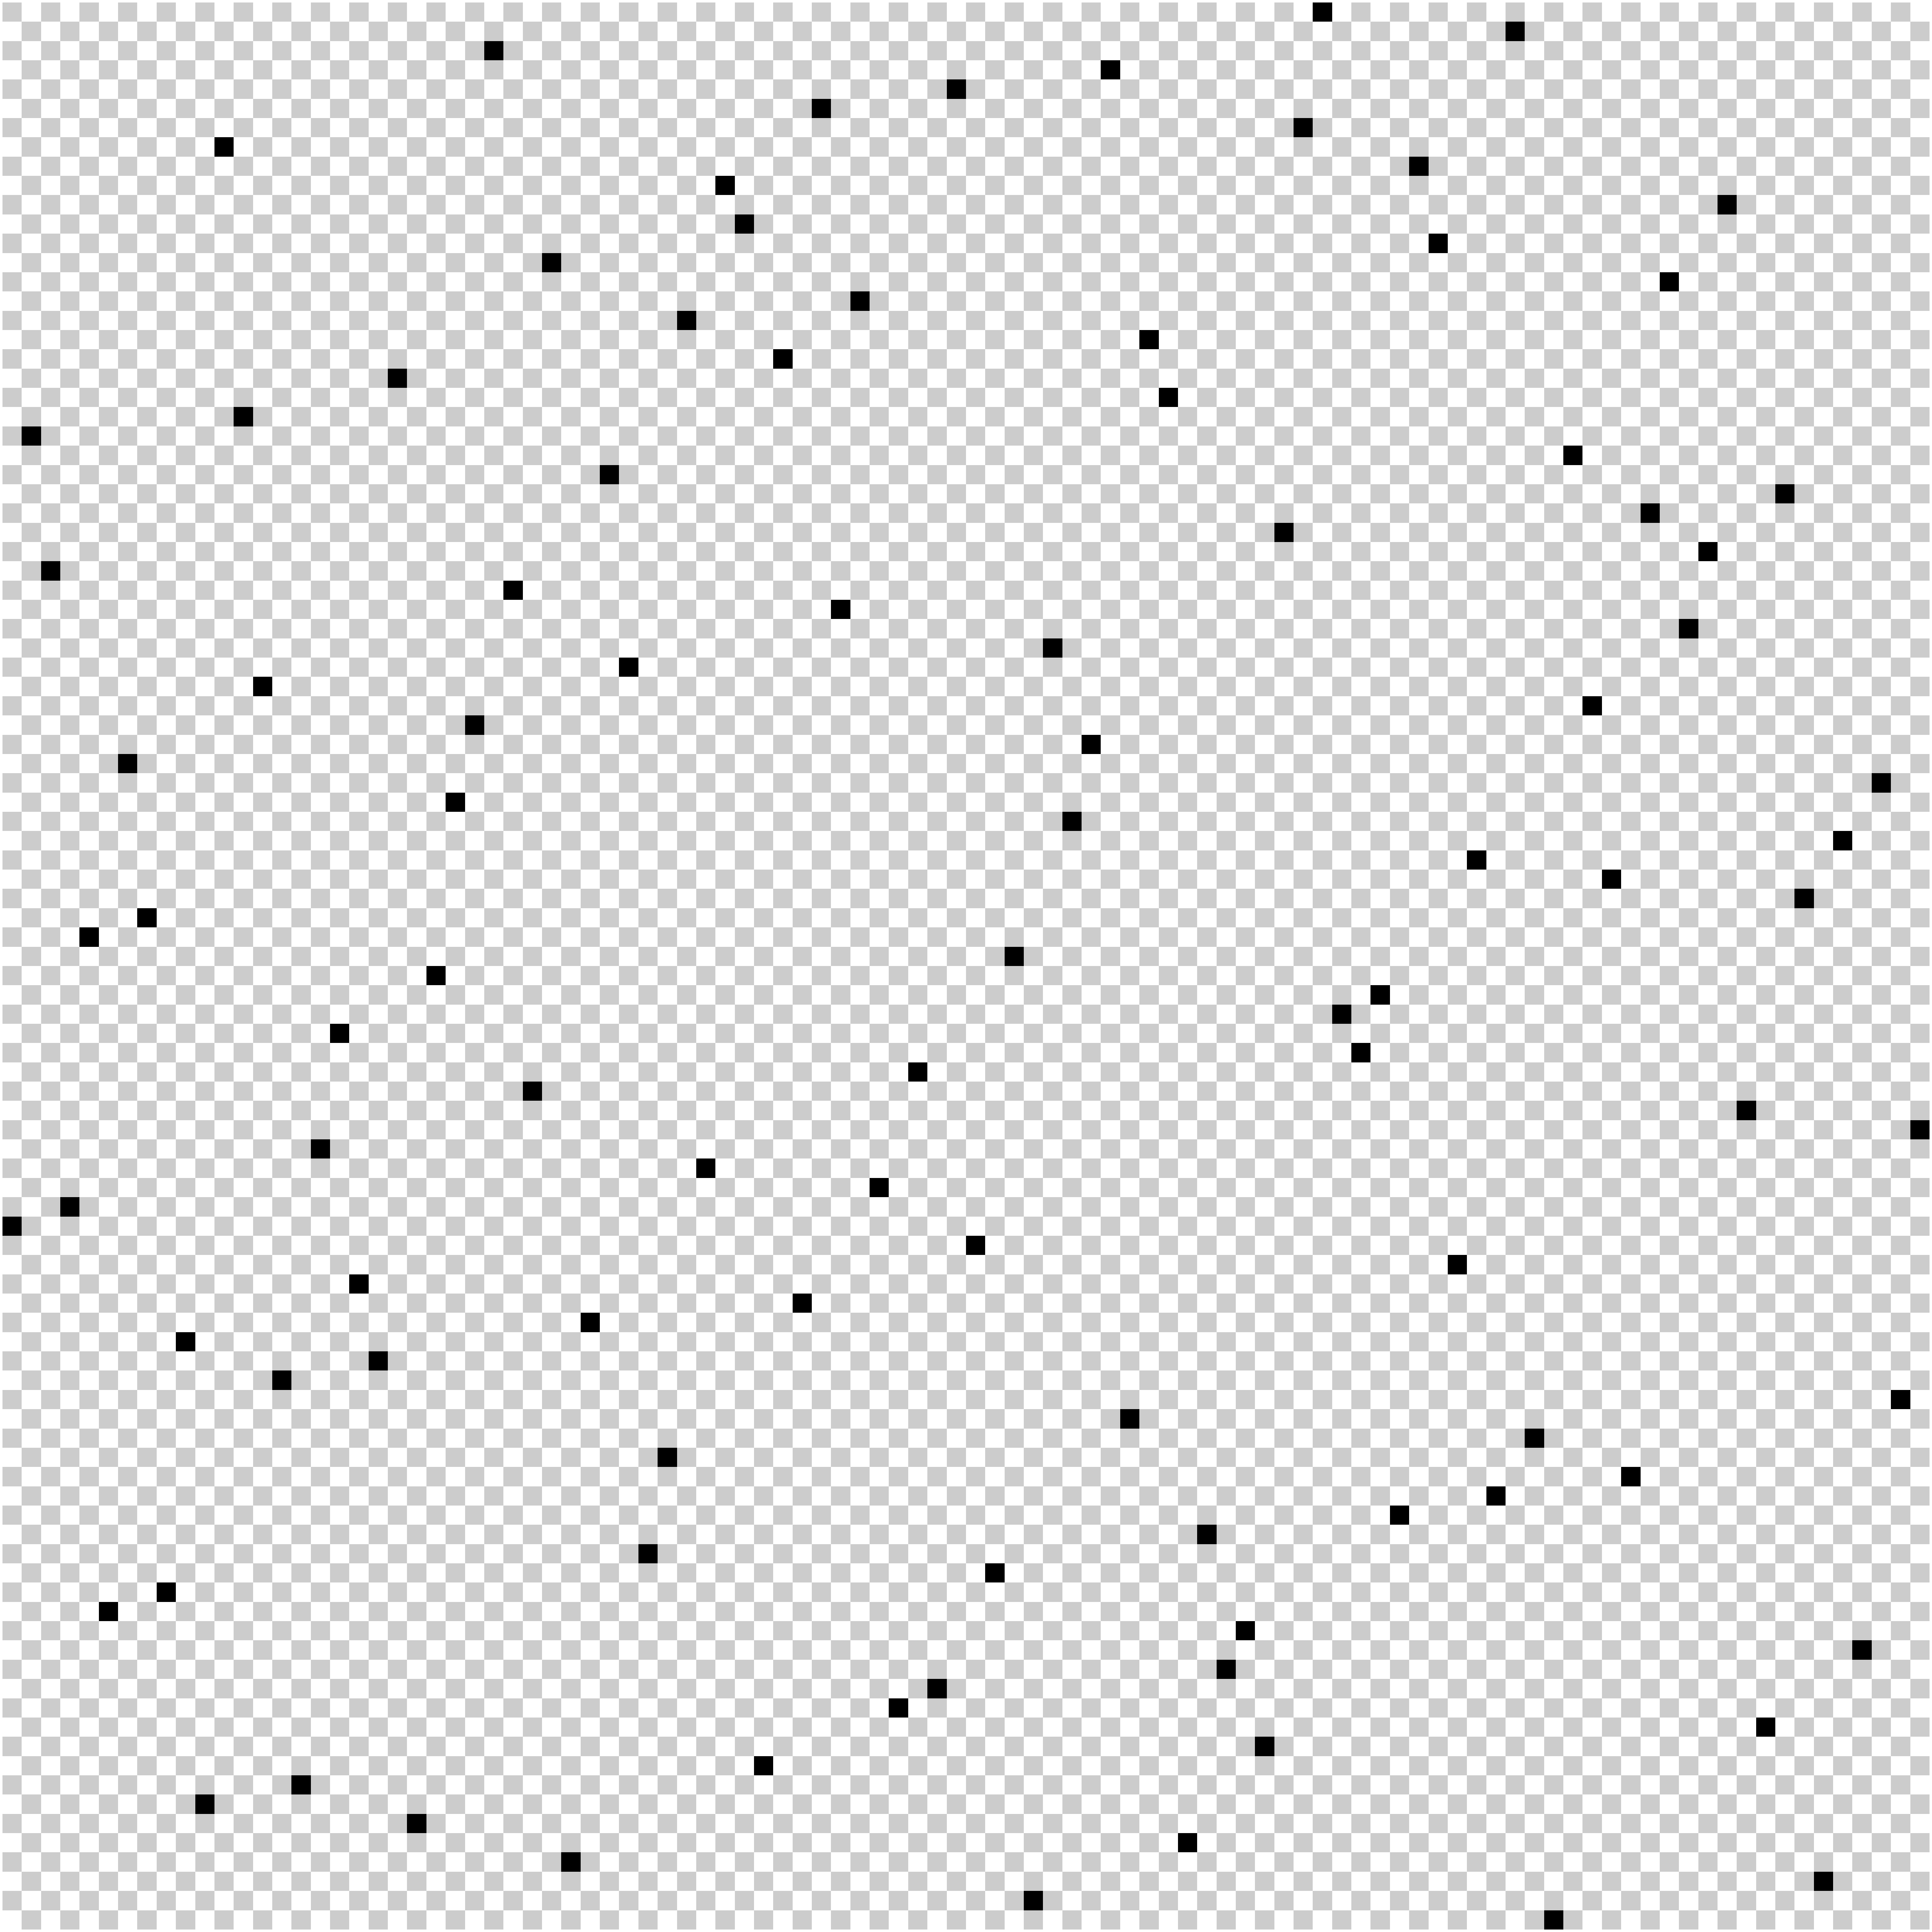

In [14]:
board = make_board(queens_loc)
board = np.array(board)
plt.figure(figsize=(100,100))
plt.imshow(board, cmap='gray'), plt.axis('off')

## 300_queens

For 300_queens we use below parameters:

temperature = 1, num_population = 3, N_QUUENS = 300

In [15]:
nq_ma(1, 3, 300)
print(queens_loc)

Runtime in second: 93.8117663860321
[156, 197, 90, 45, 153, 124, 149, 131, 16, 276, 137, 271, 106, 56, 54, 19, 82, 95, 184, 132, 21, 285, 223, 207, 154, 135, 262, 269, 43, 77, 282, 57, 85, 253, 20, 169, 139, 130, 215, 178, 267, 211, 127, 52, 176, 83, 191, 244, 217, 31, 5, 162, 232, 182, 78, 119, 3, 174, 118, 136, 227, 168, 87, 81, 32, 157, 170, 86, 246, 134, 117, 126, 44, 123, 69, 67, 74, 234, 292, 270, 280, 181, 236, 158, 294, 231, 114, 76, 239, 30, 49, 265, 34, 4, 219, 200, 198, 245, 38, 263, 250, 274, 172, 8, 64, 161, 9, 278, 229, 11, 293, 143, 147, 120, 47, 22, 298, 73, 17, 65, 140, 10, 204, 125, 6, 98, 36, 84, 289, 230, 261, 35, 221, 12, 206, 194, 167, 281, 113, 213, 70, 66, 295, 15, 201, 179, 252, 259, 0, 275, 108, 279, 146, 291, 62, 288, 26, 51, 273, 97, 255, 297, 249, 160, 29, 214, 142, 152, 258, 25, 284, 225, 150, 203, 218, 238, 247, 164, 101, 240, 63, 96, 60, 2, 133, 254, 104, 18, 109, 257, 138, 287, 185, 53, 210, 212, 23, 128, 237, 166, 14, 75, 299, 112, 68, 59, 180, 50, 24,

visualize the data

In [16]:
board = make_board(queens_loc)
board = np.array(board)
plt.figure(figsize=(300,300))
plt.imshow(board, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x14f98a9f160>, (-0.5, 299.5, 299.5, -0.5))

## 1000_queens

For 1000_queens we use below parameters:

temperature = 100, num_population = 3, N_QUUENS = 1000

In [18]:
nq_ma(100, 3, 1000)
print(queens_loc)

Runtime in second: 272.5197160243988
[702, 697, 913, 199, 383, 629, 870, 121, 986, 77, 631, 370, 334, 517, 829, 480, 980, 232, 501, 964, 231, 100, 433, 341, 713, 504, 492, 669, 339, 279, 997, 316, 525, 664, 74, 604, 204, 498, 108, 949, 550, 373, 741, 521, 372, 359, 505, 710, 324, 569, 809, 432, 118, 987, 282, 532, 190, 208, 619, 400, 394, 816, 444, 551, 635, 570, 673, 128, 151, 458, 871, 527, 557, 647, 428, 343, 424, 733, 345, 474, 564, 919, 425, 187, 716, 387, 636, 312, 704, 640, 459, 508, 625, 512, 277, 562, 159, 261, 684, 3, 589, 812, 686, 310, 518, 703, 820, 328, 207, 813, 872, 737, 999, 378, 586, 780, 898, 757, 846, 787, 241, 790, 572, 940, 33, 369, 379, 442, 747, 799, 255, 81, 688, 668, 214, 92, 936, 904, 137, 728, 485, 467, 95, 162, 938, 320, 307, 242, 449, 827, 718, 460, 610, 500, 183, 436, 195, 144, 53, 171, 972, 927, 965, 409, 755, 203, 358, 356, 235, 745, 192, 361, 968, 375, 368, 578, 476, 771, 881, 487, 351, 327, 267, 715, 113, 175, 353, 682, 311, 202, 493, 863, 627, 289, 8

visualize the data

In [19]:
board = make_board(queens_loc)
board = np.array(board)
plt.figure(figsize=(1000,1000))
plt.imshow(board, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x14f98afce20>, (-0.5, 999.5, 999.5, -0.5))

ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 72000x72000 with 1 Axes>

So we cant print chess board so far because its so big :)))

## 2000_queens

For 2000_queens we use below parameters:

temperature = 200, num_population = 3, N_QUUENS = 2000

In [20]:
nq_ma(200, 3, 2000)
print(queens_loc)

Runtime in second: 2351.8642208576202
[942, 682, 831, 758, 1704, 572, 938, 1492, 667, 790, 1383, 1857, 1771, 335, 287, 439, 1048, 1635, 499, 1269, 899, 910, 1392, 531, 933, 1632, 1767, 1540, 180, 1517, 1237, 1865, 1066, 676, 1933, 460, 475, 843, 1353, 1684, 1042, 1062, 136, 939, 539, 641, 347, 1613, 631, 516, 1308, 660, 1739, 487, 1144, 637, 134, 297, 1512, 270, 1098, 337, 1978, 369, 1510, 175, 454, 341, 1361, 422, 288, 120, 1242, 1678, 1094, 1188, 793, 1249, 1663, 1445, 991, 514, 1058, 1541, 782, 314, 157, 119, 1595, 36, 1354, 819, 1499, 960, 883, 1742, 1736, 717, 3, 45, 634, 1909, 1230, 811, 1590, 855, 1706, 1655, 1114, 882, 799, 1443, 1005, 239, 70, 1112, 1566, 609, 967, 1887, 1263, 681, 1321, 1181, 455, 1787, 623, 1670, 1102, 1946, 1954, 1849, 1336, 1309, 847, 566, 241, 218, 726, 930, 130, 1837, 1794, 669, 321, 1994, 1045, 794, 252, 21, 1639, 1437, 709, 1536, 467, 875, 562, 1828, 612, 182, 1390, 234, 1251, 707, 1498, 658, 670, 1358, 477, 1197, 652, 501, 1986, 830, 694, 1313, 727, 5

## 16000_queens

For 15000_queens we use below parameters:

temperature = 4000, num_population = 2, N_QUUENS = 16000

NOTE : we must reduse num of population to make the algorithm faster

In [21]:
nq_ma(4000, 2, 16000)
print(queens_loc)

Runtime in second: 7432.4329448309342
[10592, 11032, 15106, 5388, 4416, 732, 5136, 15180, 12764, 5079, 14029, 8525, 10232, 14496, 12086, 1805, 983, 9650, 1730, 3943, 5790, 11698, 4157, 5400, 2433, 9081, 11897, 346, 4600, 4186, 14045, 12970, 7837, 5689, 9674, 4278, 4943, 772, 8375, 9718, 13036, 6535, 13483, 8784, 15061, 11306, 9906, 2537, 4758, 10533, 14016, 10731, 9097, 7266, 5105, 6262, 8928, 2717, 8849, 29, 10004, 3600, 10478, 10879, 7915, 1155, 4385, 5530, 13932, 6493, 11662, 15380, 6416, 8698, 1429, 6444, 3861, 6679, 203, 4999, 1614, 9542, 5308, 8712, 12533, 3296, 2922, 7881, 5855, 1554, 7406, 10589, 13582, 15584, 4115, 9035, 13710, 12037, 2171, 8601, 12798, 11825, 15176, 8446, 7208, 9814, 11594, 11262, 10403, 2574, 13979, 4276, 8292, 4220, 2511, 11765, 5925, 2089, 9825, 9525, 13400, 6343, 3443, 13096, 4806, 2443, 12480, 14669, 9168, 6353, 1939, 8265, 2003, 8468, 8885, 7353, 10653, 9373, 14505, 4272, 11854, 13176, 8264, 1445, 6510, 7422, 7645, 4153, 14700, 8510, 10481, 15685, 9453,